### Necessary imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interest_rate_model import InterestRateModel

### Model Initialization

In [2]:
# Initialize the model
initial_rate = 0.0
volatility = 0.02
mean_reversion = 0.1
drift = 0.1
time_step = 1/12 # Monthly data

model = InterestRateModel(initial_rate, volatility, mean_reversion, drift, time_step)


### Path Simulation 

#### Using Euler Maryuama Scheme

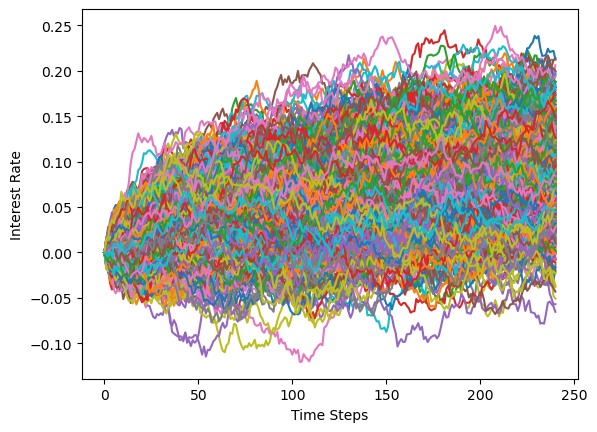

In [5]:
# Simulate paths
num_steps = 240
num_paths = 1000

em_paths = model.simulate_euler_maruyama(num_steps, num_paths)

# Plot paths
model.plot_paths(em_paths)

#### Using Milstein Scheme

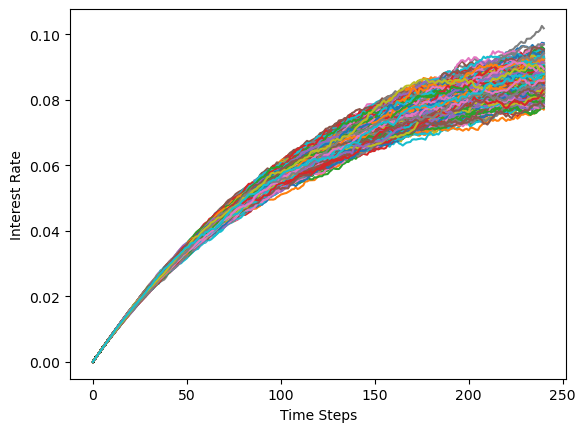

In [6]:
# Simulate paths
num_steps = 240
num_paths = 1000

milstein_paths = model.simulate_milstein(num_steps, num_paths)

# Plot paths
model.plot_paths(milstein_paths)

### Parameter Calibration

To show the ability of the InterestRateModel class to calibrate its parameters, we will go through the following steps : 
- Initialize model0 with parameters parameters volatility_0, mean_reversion_0, drift_0.
- Simulation of a path with model0 Euler Maryuama scheme.
- Initialization of model1, using random parameters volatility_1, mean_reversion_1, drift_1.
- Use of the calibrate_parameters function to calibrate our parameters, with the goal that end parameters of model1 reach parameters of model0.

#### Model 0 Initialization

In [7]:
initial_rate = 0.0
volatility_0 = 0.3
mean_reversion_0 = 0.2
drift_0 = 1.5
time_step = 1/12

model0 = InterestRateModel(initial_rate, volatility_0, mean_reversion_0, drift_0, time_step)

#### Simulation of a path with model 0

/var/folders/y_/34mq4jln3j1flmh07yrnskvc0000gn/T/ipykernel_43525/3186628894.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2000-01-01', periods=num_steps+1, freq='M')


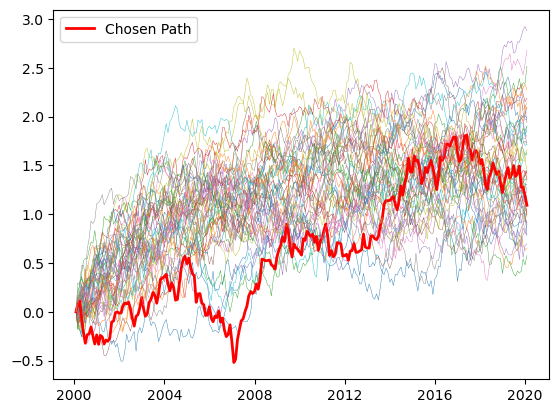

In [8]:
num_steps = 240 # 20*12 for twenty years of monthly data
num_paths = 50 # We will simulate 50 paths, and pick one of them at random.

paths = model0.simulate_euler_maruyama(num_steps, num_paths)

# For plot
dates = pd.date_range(start='2000-01-01', periods=num_steps+1, freq='M')
chosen_path_number = np.random.choice(num_paths)
random_path = paths[:, chosen_path_number]

for path in range(num_paths):
    if path == chosen_path_number:
        plt.plot(dates, paths[:, path], color='red', linewidth=2, label='Chosen Path')
    else:
        plt.plot(dates, paths[:, path], linewidth=0.3)

plt.legend()
plt.show()

We can also take the mean path amongst all generated paths.

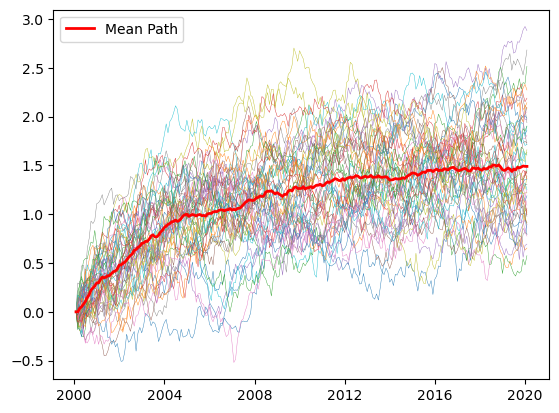

In [13]:
mean_path = np.mean(paths, axis=1)

for path in range(num_paths):
    plt.plot(dates, paths[:, path], linewidth=0.3)

plt.plot(dates, mean_path, color='red', linewidth=2, label='Mean Path')
plt.legend()
plt.show()


#### Initialization of model 1 using random parameters

In [26]:
initial_rate = 0.00
volatility_1 = np.random.random()
mean_reversion_1 = np.random.random()
drift_1 = np.random.random()
time_step = 1/12

model1 = InterestRateModel(initial_rate, volatility_1, mean_reversion_1, drift_1, time_step)

#### Parameter calibration

In [28]:
# Using a random path
model1.print_parameters()

model1.calibrate_parameters(simulated_path)

model1.print_parameters()

Model parameters
Volatility : 0.30847018984504426
Mean Reversion : 0.1357547178567464
Drift : 1.0549068054824302
Model parameters
Volatility : 0.30847018831129686
Mean Reversion : 0.13575472092424115
Drift : 1.0549068054824302


Problem : due to the stochastic nature of the processes, the randomly chosen path does not necessarily have the same parameters than model0.
Therefore we cannot ensure directly that our calibrate_parameters function works correctly. 
To test this, we will study the distribution of the parameters, when calibrating the model for each of the 100 chosen paths. 

### Full test of parameter calibration.

#### Model 0 initialization

In [57]:
initial_rate = 0.0
volatility_0 = 0.2
mean_reversion_0 = 0.3
drift_0 = 1
time_step = 1/12

model0 = InterestRateModel(initial_rate, volatility_0, mean_reversion_0, drift_0, time_step)

#### Simulating numerous paths

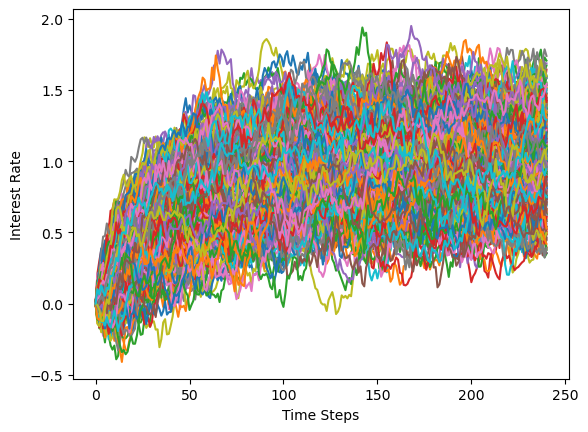

In [58]:
num_steps = 240 # 20*12 for twenty years of monthly data
num_paths = 500 # We will simulate 100.

paths = model0.simulate_euler_maruyama(num_steps, num_paths)
model0.plot_paths(paths)

#### Calibration process on each input path

In [59]:
mean_reversion_1 = []
drift_1 = []
volatility_1 = []

initial_rate = 0.0

# Calibrate parameters for each path and store results
for path in range(num_paths):
    model1 = InterestRateModel(initial_rate, np.random.random(), np.random.random(), np.random.random(), time_step)  # Different initial guesses
    model1.calibrate_parameters(paths[:, path])
    mean_reversion_1.append(model1.mean_reversion)
    drift_1.append(model1.drift)
    volatility_1.append(model1.volatility)

/Users/quentinhuet/Documents/COURS/2A/Krakow/Python in Finance/Project/interest_rate_model.py:111: RuntimeWarning: divide by zero encountered in log
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((dr - mean)**2) / (2 * variance)
/Users/quentinhuet/Documents/COURS/2A/Krakow/Python in Finance/Project/interest_rate_model.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((dr - mean)**2) / (2 * variance)
/Users/quentinhuet/Documents/COURS/2A/Krakow/Python in Finance/Project/interest_rate_model.py:111: RuntimeWarning: invalid value encountered in scalar subtract
  log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((dr - mean)**2) / (2 * variance)


#### Study of the results

We first look at the mean values of the results.

In [60]:
print(f'True drift : {drift_0}, Drift - Mean value : {np.mean(drift_1)}')
print(f'True mean reversion : {mean_reversion_0}, Mean reversion - Mean value : {np.mean(mean_reversion_1)}')
print(f'True volatility : {volatility_0}, Volatility - Mean value : {np.mean(volatility_1)}')

True drift : 1, Drift - Mean value : 0.9637932314548983
True mean reversion : 0.3, Mean reversion - Mean value : 0.4980133767801086
True volatility : 0.2, Volatility - Mean value : 0.4674003260380937


We can also look at the median values.

In [62]:
print(f'True drift : {drift_0}, Drift - Median value : {np.median(drift_1)}')
print(f'True mean reversion : {mean_reversion_0}, Mean reversion - Median value : {np.median(mean_reversion_1)}')
print(f'True volatility : {volatility_0}, Volatility - Median value : {np.median(volatility_1)}')

True drift : 1, Drift - Median value : 0.9724063016800719
True mean reversion : 0.3, Mean reversion - Median value : 0.4706833929580907
True volatility : 0.2, Volatility - Median value : 0.3764068807564225


Finlly, we can plot bar graphs showing the representation of our calibrated parameters.

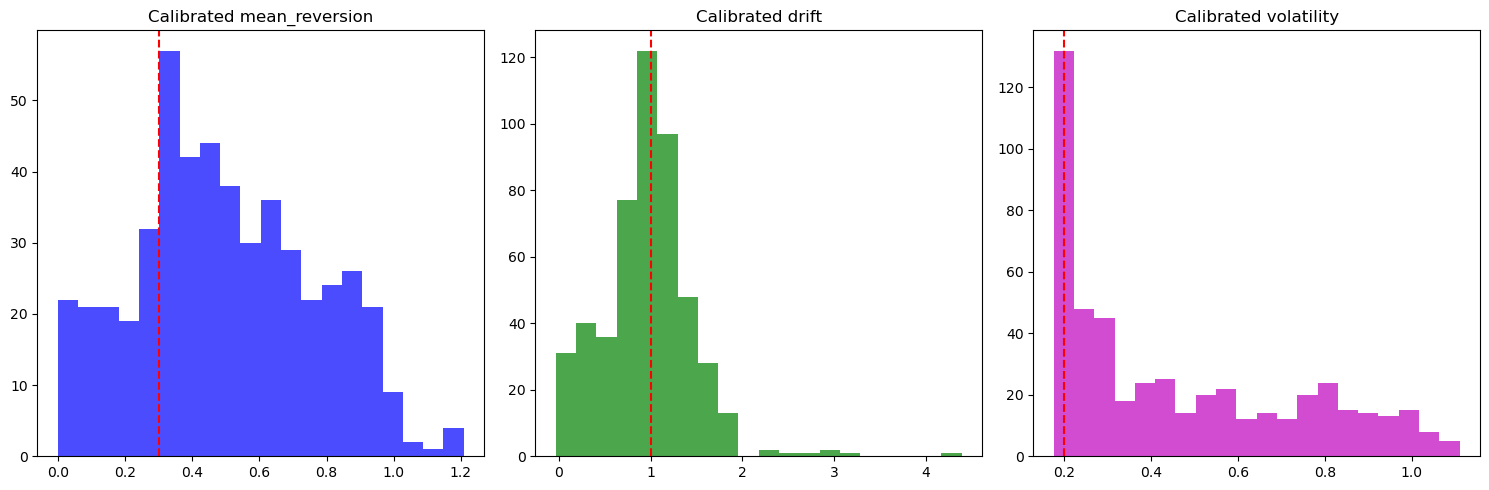

In [61]:
# Plot histogram of the calibrated parameters
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mean_reversion_1, bins=20, color='b', alpha=0.7)
plt.axvline(mean_reversion_0, color='r', linestyle='--')
plt.title('Calibrated mean_reversion')

plt.subplot(1, 3, 2)
plt.hist(drift_1, bins=20, color='g', alpha=0.7)
plt.axvline(drift_0, color='r', linestyle='--')
plt.title('Calibrated drift')

plt.subplot(1, 3, 3)
plt.hist(volatility_1, bins=20, color='m', alpha=0.7)
plt.axvline(volatility_0, color='r', linestyle='--')
plt.title('Calibrated volatility')

plt.tight_layout()
plt.show()

### Asset Pricing

Once we have correctly calibrated our model based on historical data, we can use it to price assets. To do so, we use the estimate_asset_price function. It works in the following way : 
- it takes as an input generated paths, using a calibrated model, and the time_step for which we want the price of the asset, n.
- the function takes the mean value of all paths at the given time step : this value is considered as the value the asset will have.

In [63]:
num_steps = 240
num_paths = 100
estimation_step = 150

paths = model.simulate_euler_maruyama(num_steps, num_paths)

estimated_price = model.estimate_asset_price(paths, estimation_step)

print(f'Estimated price : {estimated_price}')

Estimated price : 0.4482750132021232
